## Check the comtamianted data

In [47]:
import sys
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join,Column

c = 299792

sys.path.append('/global/homes/s/shengyu/project_rc/main/Y3/')
from helper import REDSHIFT_LSS_VSMEAR, REDSHIFT_LSS_CUBICBOX, EDGES, COLOR_TRACERS, GET_RECON_BIAS
from Y3_redshift_systematics import vsmear, vsmear_modelling, vsmear_modelling_slitless_internal

In [13]:
base_dir = '/pscratch/sd/s/shengyu/galaxies/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit_v4_2/altmtl0/mock0/LSScats/dv_obs_z0.8-2.1'
fn = base_dir + '/QSO_SGC_clustering.dat.fits'

data = Table(fitsio.read(fn))

/tmp/ipykernel_1230233/2972611527.py:5: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(dZ), density=True, histtype='step', bins=50)


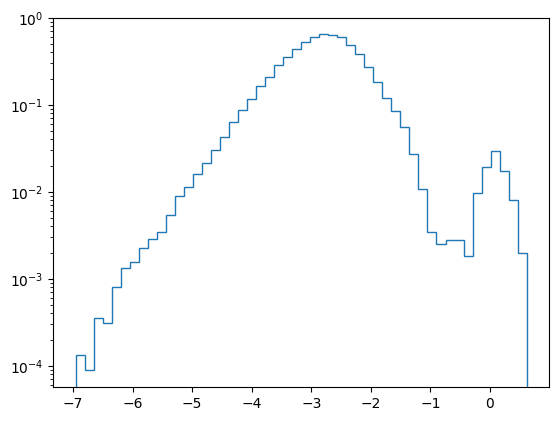

In [160]:
dZ = data['Z']- data['Z_ini']

# c = 299792
# dv = c*dZ/2.5
plt.hist(np.log10(dZ), density=True, histtype='step', bins=50)
plt.yscale('log')

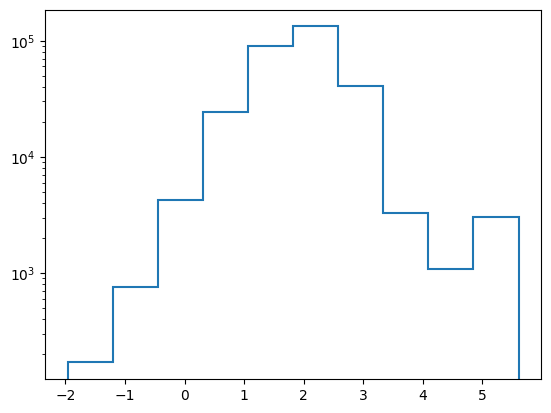

In [ ]:
# sys.path.append('/global/cfs/projectdirs/desi/users/jiaxiyu/repeated_observations/')
# from Y3_redshift_systematics import vsmear

add_dv = vsmear('QSO', zmin=0.8, zmax=2.1, Ngal=len(data), dvmode='obs')
Z= add_dv*

add_dv_pos = abs(add_dv)[abs(add_dv) > 0] 
plt.hist(np.log10(add_dv_pos), 
        #  bins = np.linspace(-3000, 3000, 50), 
        histtype='step', lw = 1.5)
plt.yscale('log')

298619
298619


(0.75, 2.15)

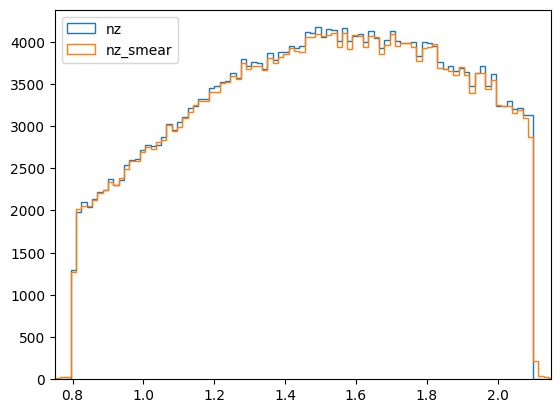

In [149]:
zmin = 0.8 
zmax = 2.1

selz  = (zmin < data['Z_ini']) & (data['Z_ini'] <=zmax)
# data['Z'] += add_dv* selz * (1 + data['Z']) / c
add_dv = vsmear('QSO', float(zmin), float(zmax), len(data), zmode='LSS', dvmode='obs')
Z_dv =  data["Z_ini"] + add_dv * selz * (1 + data["Z_ini"]) / c

print(len(Z_dv))
print(len(data["Z_ini"]))

plt.hist(data["Z_ini"], bins=200, range=(0, 3), 
         histtype='step', label = 'nz',
        #  density=True,
        )
plt.hist(Z, bins=200, range=(0, 3), 
         histtype='step',  label = 'nz_smear',
        #  density=True, 
        )
# plt.yscale('log')
plt.legend(loc=2)
plt.xlim([0.75, 2.15])

In [163]:
np.loadtxt(base_dir+'/QSO_nz.txt')
np.loadtxt('/pscratch/sd/s/shengyu/galaxies/catalogs/Y1/mocks/SecondGenMocks/AbacusSummit_v4_2/altmtl0/mock0/LSScats//QSO_nz.txt')

array([[8.10000002e-01, 8.00000000e-01, 8.20000000e-01, 2.63515874e-05,
        8.14200000e+03, 3.08975693e+08],
       [8.29999983e-01, 8.20000000e-01, 8.40000000e-01, 2.75703619e-05,
        8.74000000e+03, 3.17007083e+08],
       [8.50000024e-01, 8.40000000e-01, 8.60000000e-01, 2.76527769e-05,
        8.98400000e+03, 3.24885997e+08],
       [8.70000005e-01, 8.60000000e-01, 8.80000000e-01, 2.86584568e-05,
        9.53200000e+03, 3.32606883e+08],
       [8.89999986e-01, 8.80000000e-01, 9.00000000e-01, 2.85738497e-05,
        9.72000000e+03, 3.40171174e+08],
       [9.09999967e-01, 9.00000000e-01, 9.20000000e-01, 2.91849160e-05,
        1.01440000e+04, 3.47576810e+08],
       [9.30000007e-01, 9.20000000e-01, 9.40000000e-01, 2.95220111e-05,
        1.04750000e+04, 3.54820001e+08],
       [9.49999988e-01, 9.40000000e-01, 9.60000000e-01, 2.89579975e-05,
        1.04800000e+04, 3.61903478e+08],
       [9.70000029e-01, 9.60000000e-01, 9.80000000e-01, 2.92983951e-05,
        1.08060000e+04, 